## Sentiment Analysis of Movie Reviews

In [1]:
# import useful libraries
import pandas as pd # pandas is used for handling tables in form of dataframes
import numpy as np # used for algebraic problems
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # a more advanced ploting library

# show charts inline
%matplotlib inline

import re # regular expressions
from bs4 import BeautifulSoup as bs # processes html
import nltk # natural language processing toolkit
from nltk.corpus import stopwords # stopwords
from nltk.stem import WordNetLemmatizer # word lemmatizer

from sklearn.feature_extraction.text import CountVectorizer # for preprocessing text
from sklearn.model_selection import train_test_split # splits dataset into train and test sets
from sklearn.linear_model import LogisticRegression # regressor for classification
from sklearn.tree import DecisionTreeClassifier # decision tree classifier

In [2]:
# loading the dataset
df = pd.read_csv("IMDB Dataset.csv")
# display any five rows of dataset
df.sample(5)

,review,sentiment
17664,I found the pace to be glacial and the origina...,negative
4477,I didn't like watching DS9 compared to other S...,negative
29824,"First of all, I apologize for my English. <br ...",negative
47812,"A remarkable film, bringing to the surface all...",positive
24669,Here's another of the 1940's westerns that I w...,positive


In [3]:
# show any review
display(df['review'][3])

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [4]:
# show any review
display(df['review'][20])

"After the success of Die Hard and it's sequels it's no surprise really that in the 1990s, a glut of 'Die Hard on a .....' movies cashed in on the wrong guy, wrong place, wrong time concept. That is what they did with Cliffhanger, Die Hard on a mountain just in time to rescue Sly 'Stop or My Mom Will Shoot' Stallone's career.<br /><br />Cliffhanger is one big nit-pickers dream, especially to those who are expert at mountain climbing, base-jumping, aviation, facial expressions, acting skills. All in all it's full of excuses to dismiss the film as one overblown pile of junk. Stallone even managed to get out-acted by a horse! However, if you an forget all the nonsense, it's actually a very lovable and undeniably entertaining romp that delivers as plenty of thrills, and unintentionally, plenty of laughs.<br /><br />You've got to love John Lithgows sneery evilness, his tick every box band of baddies, and best of all, the permanently harassed and hapless 'turncoat' agent, Rex Linn as Travers

The reviews contain html tags, punctuations that are not useful for this analysis, we will be removing them to make sure that only texts that are useful for our analysis remain.

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
# word lemmatizer
lemmatizer = WordNetLemmatizer()

In [7]:
# writing a function to remove tags and punctuations from reviews
def clean_review(review):
    # remove tags
    review_without_tags = bs(review).get_text()
    # remove punctuations
    review_without_punc = re.sub("[^a-zA-Z]", " ", review_without_tags)
    # make all text lower case
    review_lower = review_without_punc.lower()
    # split review into list
    split_review = review_lower.split()
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    rev = [i for i in split_review if i not in stop_words]
    # lemmatize word
    lemma_review = [lemmatizer.lemmatize(i) for i in rev]
    return(''.join(lemma_review))

In [8]:
# create a new copy of df 
reviews = df.copy()
# apply clean review function on reviews in df
reviews['review'] = reviews['review'].apply(lambda x: clean_review(x))
# view first five rows of reviews
reviews.head()

/opt/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,review,sentiment
0,onereviewermentionedwatchingozepisodehookedrig...,positive
1,wonderfullittleproductionfilmingtechniqueunass...,positive
2,thoughtwonderfulwayspendtimehotsummerweekendsi...,positive
3,basicallyfamilylittleboyjakethinkzombieclosetp...,negative
4,pettermatteilovetimemoneyvisuallystunningfilmw...,positive


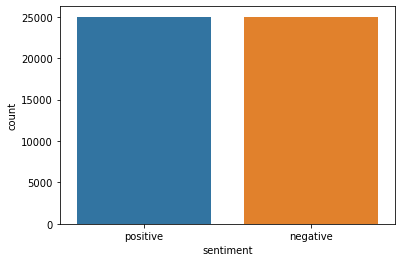

In [9]:
# check for data imbalance in sentiment column
sns.countplot(x = reviews['sentiment']);

In [10]:
reviews.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [11]:
# preprocessing
vc = CountVectorizer()
X = vc.fit_transform(reviews['review']).toarray()
y = reviews['sentiment']

# split x and y into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

# train an ml model using a logistic regressor
lr = LogisticRegression()
# fit model
lr.fit(Xtrain, ytrain)
lr_pred = lr.predict(Xtest)

In [12]:
# view first 10 predictions
lr_pred[0:10]

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

In [13]:
# accuracy score on train set
lr.score(Xtrain, ytrain)

1.0

In [14]:
# accuracy score on test set
lr.score(Xtest, ytest)

0.49793333333333334

This is overfitting!

In [ ]:
# let's try the tree classifier
tree = DecisionTreeClassifier()
# fit the model
tree.fit(Xtrain, ytrain)
tree_pred = tree.predict(Xtest)

In [ ]:
# view first 10 predictions
tree_pred[0:10]